In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime
import math

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [11]:
name1CSV = 'innis_soi_wh.csv'
soi_wh = pd.read_csv(str(name1CSV))
soi_wh

,soi,Wh
0,-0.9,1.246717
1,-0.7,1.656081
2,-0.5,0.991064
3,-1.2,2.176583
4,-0.3,1.996667
5,-0.8,1.974246
6,-0.8,1.238238
7,-0.9,1.567897
8,-0.7,1.198661
9,-1.1,1.125377


In [12]:
date = 'inniswh_my_no_nan_long.csv' #use this dataset to plot, has dates configured differently
dates = pd.read_csv(str(date), parse_dates=['Date'])
dates

,Date,Wh
0,1993-01-01,1.246717
1,1993-02-01,1.656081
2,1993-03-01,0.991064
3,1993-04-01,2.176583
4,1993-05-01,1.996667
5,1993-06-01,1.974246
6,1993-07-01,1.238238
7,1993-08-01,1.567897
8,1993-09-01,1.198661
9,1993-10-01,1.125377


In [15]:
x = dates['Date']
y1 = soi_wh['Wh']
y2 = soi_wh['soi']

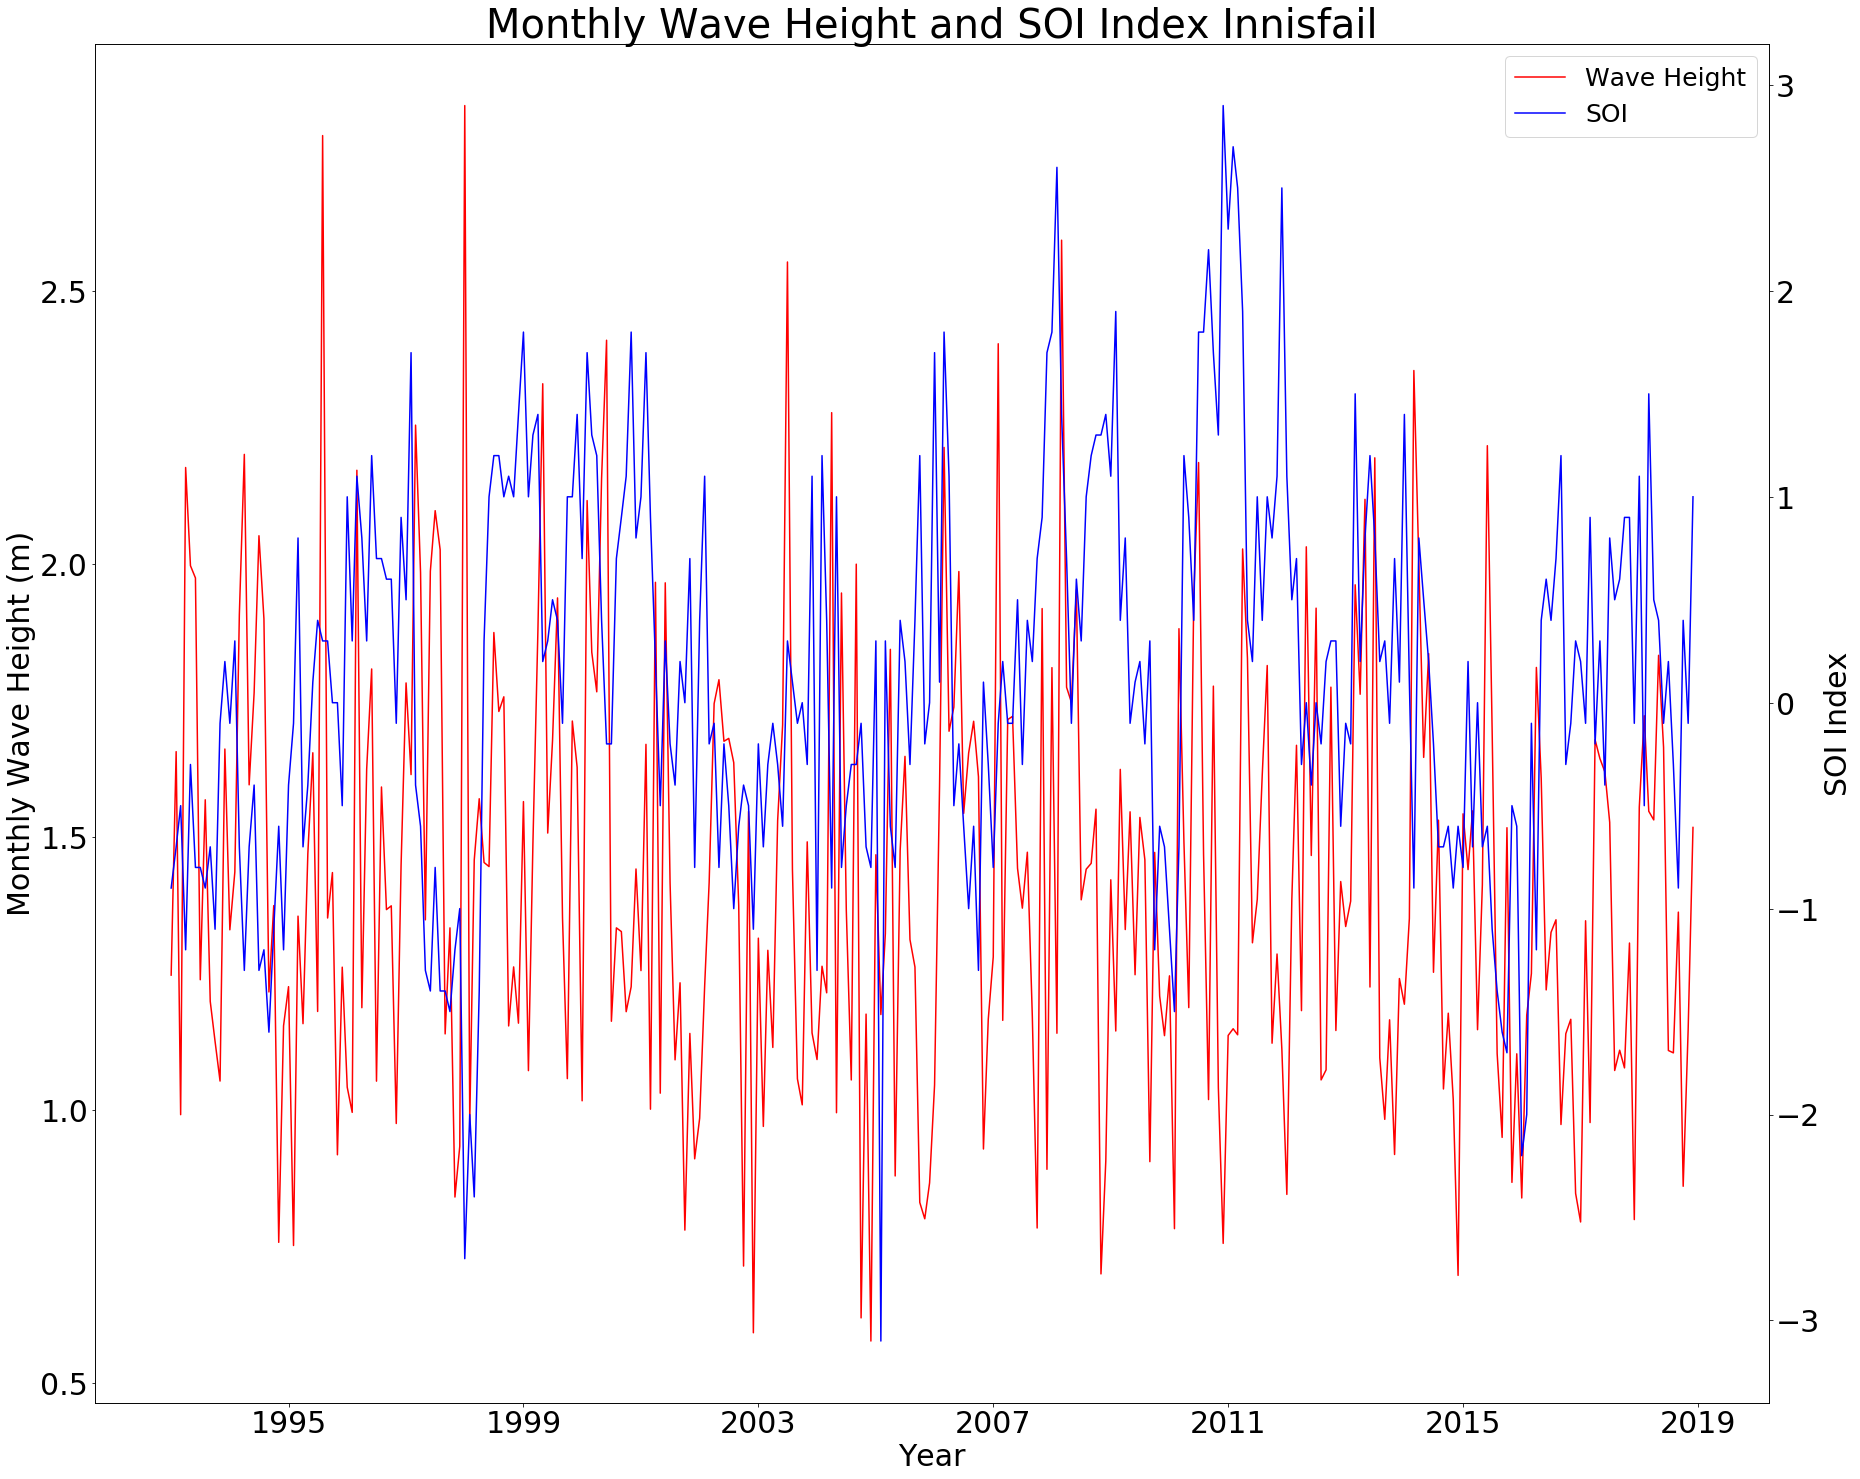

In [19]:
fig, ax1 = plt.subplots(1,1, figsize=(30,25))

#ax1.plot(xxx,y1, color='blue') #monthly mean wh

#ax2=ax1.twinx()
whh = ax1.plot(x,y1, color='red', label = 'Wave Height')
ax1.set_ylabel('Monthly Wave Height (m)', fontsize = 30)

ax2 = ax1.twinx()
soii = ax2.plot(x,y2, color='blue', label = 'SOI')
ax2.set_ylabel('SOI Index',fontsize = 30)
#ax2.set_yticklabels( rotation=90, fontsize=50)

#ax.tick_params(axis='both', which='major', labelsize=10)
#ax.tick_params(axis='both', which='minor', labelsize=8)

ax2.yaxis.set_tick_params(labelsize=30)
ax1.yaxis.set_tick_params(labelsize=30)
ax1.xaxis.set_tick_params(labelsize=30)

ax1.set_xlabel('Year',fontsize = 30)
ax2.set_title('Monthly Wave Height and SOI Index Innisfail', fontsize=40)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0, prop={'size': 25})

#ax1.legend(loc=0)
#ax2.legend(loc=1)

plt.savefig('monthly wh vs soi innis')

# Correlation btn SOI and WH

In [21]:
soi_wh['soi'].corr(soi_wh['Wh'])

-0.01634593039953815